# Customer Churn Prediction

## 1. Business understanding 

### The business questions we are trying to answer among other are mainly :

1. what is the percentage of people churning in the dataset ?
2. how are demographics (such as : Gender, Age) different between the two populations of churners and non-churners
3. what are the features that drive the churn the most

## 2. Data understanding 

**Importing the necessary packages and libraries**

In [44]:
#Necessary packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer

**Reading the data from dataset**

This dataset consists of **14 columns** and **10,000 rows**. It has **13 information attributes(features**) about the employee and a target attribute as **Exited** that tells whether the person leaves the bank or not.

1. RowNumber: An index indicating the row number in the dataset.
2. CustomerId: Unique identifier for each customer.
3. Surname: it belongs to surname of customer and string values
4. CreditScore: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.
5. Geography: it shows country of customer
6. Gender: male/female
7. Age: age of customers
8. Tenure: Number of years the customer has been with the bank.
9. Balance: Customer's money in the bank.
10. NumOfProducts: Number of products owned by the customer.
11. HasCrCard: Whether the customer has a credit card
12. IsActiveMember: Customer's presence in the bank
13. EstimatedSalary: Customer's estimated salary
14. Exited: Churn or not (0 for no churn, 1 for churn).

In [45]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [46]:
dataset.shape

(10000, 14)

In [47]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Displaying the first 5 rows from the dataset**

In [48]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Plotting percentage of churned and not churned entries**

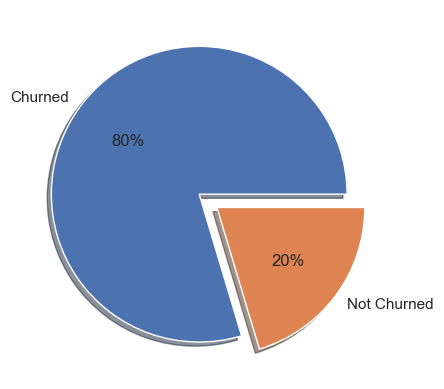

In [49]:
output = dataset['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

**Impact of Gender on Churned Data**

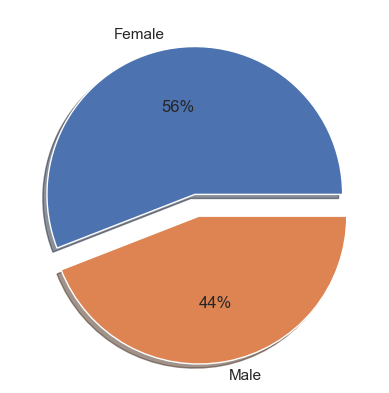

Female    1139
Male       898
Name: Gender, dtype: int64

In [50]:
df_cond = dataset['Exited'].values==1
df_churned = dataset[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

**Impact of geographical data on churned data**

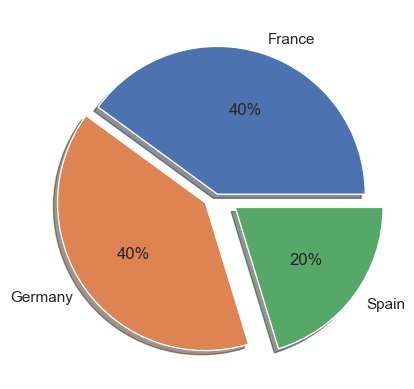

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [51]:
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

**Impact of Number Of products the customer has availed in the bank on churned and Non-churned data**


In [52]:
df_cond = dataset['Exited'].values==0
df_notchurned = dataset[df_cond]

df_notchurned['NumOfProducts'].value_counts() #count for each value of NumOfProducts of non-churned customer

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

In [53]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

<Axes: xlabel='NumOfProducts'>

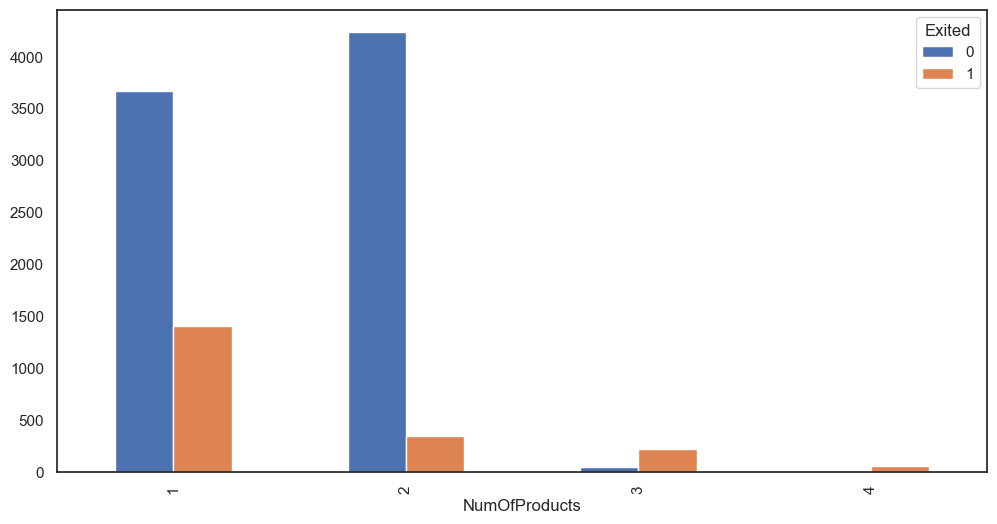

In [54]:
dataset.groupby('Exited')['NumOfProducts'].value_counts().unstack('Exited').plot.bar(figsize=(12,6))

**Analysing the Correlation among attributes by using a heatmap**

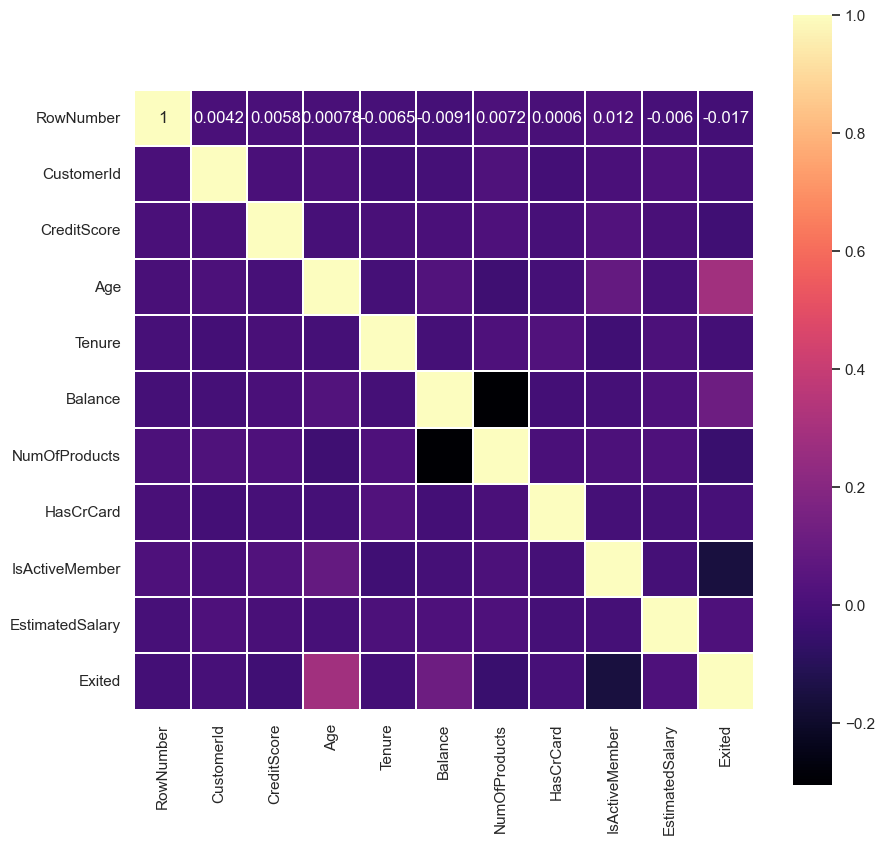

In [55]:
plt.figure(figsize=(10, 10))
sn.set(style = 'white')
sn.heatmap(dataset.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True, linewidths=0.1);

## 3. Data Preparation

**Removing the unnecessary columns and splitting the target attribute for training.**

In [56]:
features = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
target  = dataset['Exited']

Displaying the features in the dataset after removing **unnecessary attributes**.

In [57]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Displaying the value of **first 5 customer** target values.

**1 - Customer churned ( Customer left the bank)**

**0 - Customer not churned ( Customer not left the bank)**

In [58]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**Handling Categorical attribute "Geography"**

Creating new columns for each category ( France , Germany , Spain) in attribute Geography.


In [59]:
features = pd.get_dummies(features, prefix=['geo'],columns=['Geography'])
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


**Labelling the Gender value as 0 and 1.**


Male - 1

Female  - 0

In [60]:
label1 = LabelEncoder()
features['Gender'] = label1.fit_transform(features['Gender'])

In [61]:
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Splitting the dataset for training and testing.**


In [62]:
train,test,trainlabel,testlabel = train_test_split(features, target, test_size = 0.2, random_state = 1)

**Displaying the no of samples in training and testing.**

In [63]:
print("Training samples:" , train.shape[0])
print("Testing samples:" ,test.shape[0])
print("Training sample size:",train.shape)
print("Testing sample size:",test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


**Feature scaling**

Apply feature scaling to all the features of both the training and the testing  set.

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
train = sc.fit_transform(train)# Scaling fitted only to training set to avoid information leakage.
test = sc.transform(test)

## 4. Modeling

A simple **Multi-layer perceptron**   is built that consists of **1 input layer , 2 hidden layer , 1 output layer**.


*   **Dense** - Dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.

**Arguments in Dense layer:**

*   **units** - These are called hyperparameters that refers to the **no of neurons in layers**.

*   **kernel_initializer** - set the initial random weights of layers.Initializer that generates tensors with a **normal distribution**.

**Activation function:**

*   Used in **hidden** layers - **ReLU**(rectified Linear unit)
*   Used in **output** layer - **Sigmoid**(range between 0 and 1) it will give the predictions, as well as the probabilities. As the output is either **0(No)** or **1(Yes)** ,sigmoid is used.

In [65]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

C:\Users\nouha\anaconda3\envs\Nouhayla\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the ANN model**

*   **Optimizer** - **'adam'** optimizer is chosen as it can perform **stochastic gradient descent**. The stochastic gradient descent will optimize the weights to **minimize the loss** between the actual and the predicted values.

*   **Loss** - **'binary_crossentropy'** is chosen as the problem is a binary classification problem ( Yes or No )

*   **Metrics**  -  It refers the parameters need to be measured during training and testing.

In [66]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7920 - loss: 0.5569
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4233
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.3994
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3952
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8465 - loss: 0.3774
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3441
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3482
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3407
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3417
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3312
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.3368
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3041
Epoch 69/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.3003
Epoch 70/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3032
Epoch 71/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.3031
Epoch 72/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.3024
Epoch 73/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8752 - loss: 0.3015
Epoch 74/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.3000
Epoch 75/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3021
Epoch 76/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3038
Epoch 77/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.3084
Epoch 78/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3016
Epoch 79/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 

**Predicting the Testing set results**

In [68]:
loss,acc = model.evaluate(test,testlabel)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3371 
Test Accuarcy: 0.8659999966621399
Tets Loss: 0.344556599855423


**Saving and loading the model**

In [69]:
model.save("trained_model.keras")

## 4. Evaluation

In [70]:
from keras.models import load_model 
model = load_model("trained_model.keras") 
trainloss , trainaccuracy = model.evaluate(train,trainlabel)
testloss, testaccuracy = model.evaluate(test,testlabel) 
print('Train loss:', trainloss)
print('Train accuracy:', 100*trainaccuracy)
print('Test loss:', testloss)
print('Test accuracy:', 100*testaccuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8801 - loss: 0.2951
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3371
Train loss: 0.29410308599472046
Train accuracy: 87.99999952316284
Test loss: 0.344556599855423
Test accuracy: 86.59999966621399


**Making a Confusion matrix to see the results predicted**

If the predicted value (probability) >  0.5 - Yes ( Customer churned)

If the predicted value (probability) <  0.5 - No ( Customer not churned)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


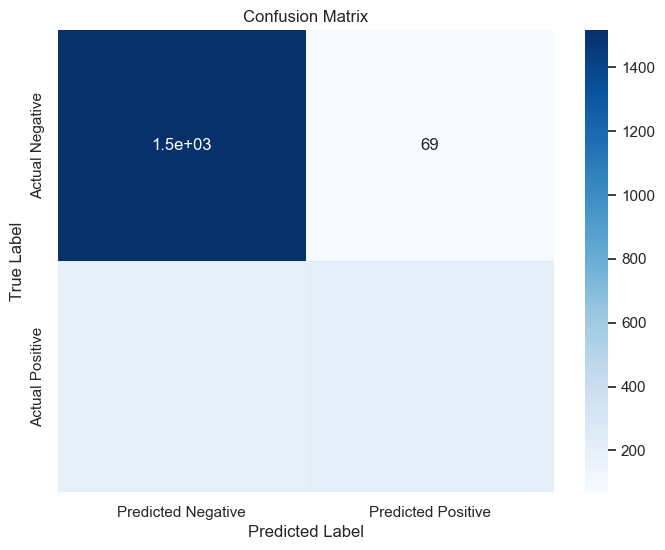

In [73]:
# Get the predictions for the test data
predictions = model.predict(test)
# Convert the probabilities to binary predictions
binary_predictions = np.round(predictions)

# Generate the confusion matrix
cm = confusion_matrix(testlabel, binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(testlabel,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.52      0.63       415

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



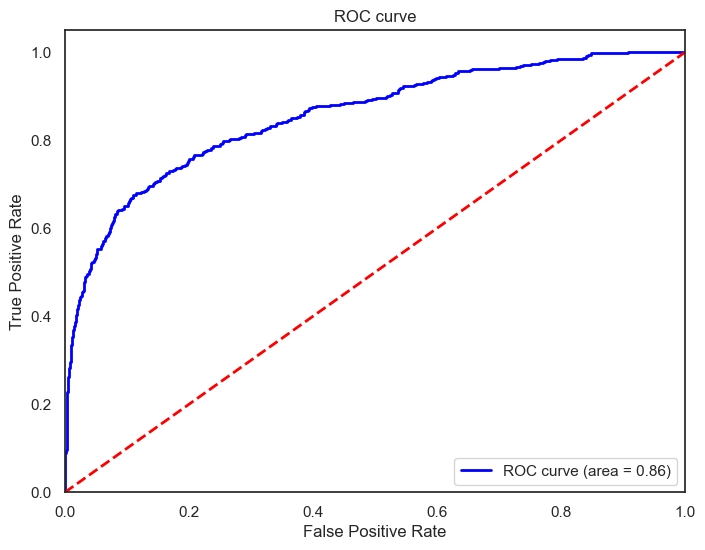

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(testlabel, predictions)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


## 6. Deployement

**Using the ANN model to predict if the customer with the following informations will leave the bank:**

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $50000

In [102]:
result = model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.04147529]]
Customer will not leave the bank in the future


C:\Users\nouha\anaconda3\envs\Nouhayla\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Geography: Germany

Credit Score: 550

Gender: Female

Age: 30 years old

Tenure: 2 years

Balance: $80000

Number of Products: 4

Does this customer have a credit card? Yes

Is this customer an Active Member: No

Estimated Salary: $70000

In [103]:
result = model.predict(sc.transform([[550, 0, 30, 2, 80000, 4, 1, 0, 70000, 0, 1, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.99806124]]
Customer will leave the bank in the future


C:\Users\nouha\anaconda3\envs\Nouhayla\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
